In [1]:
from fuzzy_art import *
from handytools import *
import sklearn.datasets as ds
import sklearn.decomposition as dcp
import matplotlib.pyplot as plt

In [2]:
iris = ds.load_iris()
data = iris['data'] / np.max(iris['data'], axis=0)
label_true = iris['target']
# pca
pca = dcp.PCA(n_components=2)
pca_xy = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92138578 0.05142129]
[4.9602239  1.17179601]


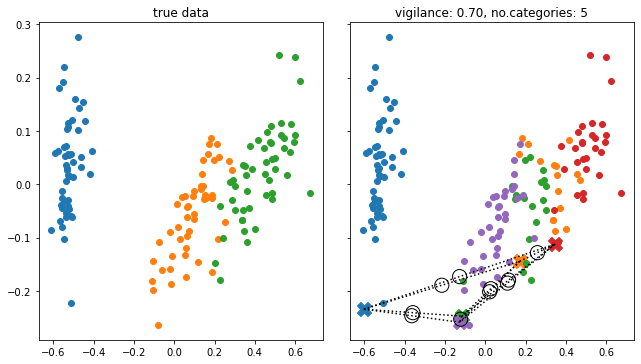

In [3]:
fig, axs = plt.subplots(1, 2,
                        figsize=(9, 5), sharex=True, sharey=True)
fig.tight_layout()

# plot true
for cat_true in range(3):
    axs[0].scatter(*np.where(label_true == cat_true, pca_xy.T, None))
axs[0].set_title('true data')

# use FuzzyART
# init
rho = 0.7
net = FuzzyART(alpha=0.5, rho=rho) # for the current iris data, rho near 0.65 seems the best in clustering data

# train
net.train(data, epochs=100) # each epoch, all data is shuffled
label_pred = net.test(data).astype(int)

cat_number = net.w.shape[0]
replay_cat = net.w[:, :4]
cat_centre = pca.transform(replay_cat)

# plot cats
for cat_pred, cat_x, cat_y in zip(range(cat_number), *cat_centre.T):
    c = next(axs[1]._get_lines.prop_cycler)['color']
    axs[1].scatter(*np.where(label_pred == cat_pred, pca_xy.T, None), color = c) # all training samples
    axs[1].scatter(cat_x, cat_y, marker = 'X', s = 200, color = c) # categorical centre
axs[1].set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))

# plot inters
ls_interidx, ls_intercat = [], []
for i in range(cat_number):
    for j in range(i + 1, cat_number):
        interidx = np.array([i, j])
        ls_interidx.append(interidx) 
        
        intercat = np.mean(net.w[interidx, :4], axis = 0)
        ls_intercat.append(intercat)
        
        intercatpca = pca.transform([intercat])
        axs[1].scatter(*intercatpca.T, marker = 'o', s = 200, edgecolors = 'k', facecolors='none')
        axs[1].plot(*cat_centre[interidx].T, c = 'k', ls = 'dotted')

replay_intercat = np.array(ls_intercat)

In [4]:
replay_cat, replay_intercat # consolidate old episode? creative with interpolation?

(array([[0.5443038 , 0.52272727, 0.14492754, 0.04      ],
        [0.73417722, 0.53977273, 0.65217391, 0.6       ],
        [0.62025316, 0.47336648, 0.46037138, 0.4       ],
        [0.70886076, 0.56818182, 0.71014493, 0.8       ],
        [0.63291139, 0.45454545, 0.43478261, 0.4       ]]),
 array([[0.63924051, 0.53125   , 0.39855072, 0.32      ],
        [0.58227848, 0.49804688, 0.30264946, 0.22      ],
        [0.62658228, 0.54545455, 0.42753623, 0.42      ],
        [0.58860759, 0.48863636, 0.28985507, 0.22      ],
        [0.67721519, 0.5065696 , 0.55627264, 0.5       ],
        [0.72151899, 0.55397727, 0.68115942, 0.7       ],
        [0.6835443 , 0.49715909, 0.54347826, 0.5       ],
        [0.66455696, 0.52077415, 0.58525815, 0.6       ],
        [0.62658228, 0.46395597, 0.44757699, 0.4       ],
        [0.67088608, 0.51136364, 0.57246377, 0.6       ]]))

In [5]:
interp2coordinates(*replay_cat[:2], 3)

array([[0.59177215, 0.52698864, 0.27173913, 0.18      ],
       [0.63924051, 0.53125   , 0.39855072, 0.32      ],
       [0.68670886, 0.53551136, 0.52536232, 0.46      ]])